# Gradient Descent（梯度下降法）

## 一、梯度下降法介绍

#### 1、特点
#### （1）不是一个机器学习算法，而是一种基于搜索的最优化方法；
#### （2）作用为最小化一个损失函数（梯度上升法：最大化一个效用函数）；
#### （3）η（步长）称为学习率（learning rate），η的取值影响获得最优解的速度，η取值不合适甚至得不到最优解；
#### （4）并不是所有函数都有唯一的极值点（局部最优解和全局最优解），解决方案为随机化初始点并多次运行（线性回归法的损失函数具有唯一的最优解）；
#### （5）η是梯度下降法的一个超参数，初始点也是梯度下降法的一个超参数。

## 二、梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5)**2 - 1

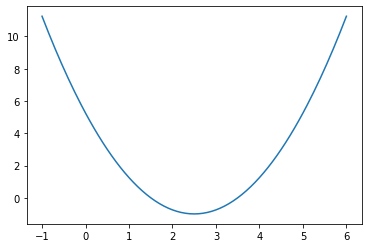

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
def dJ(theta):
    return 2*(theta-2.5)

In [6]:
def J(theta):
    return (theta-2.5)**2-1

In [7]:
eta = 0.1
epsilon = 1e-8
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


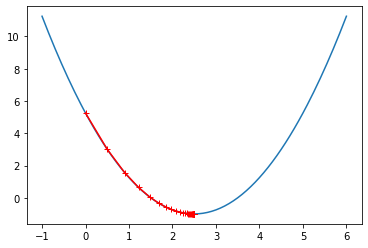

In [8]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
plt.show()

In [9]:
len(theta_history)

46

In [11]:
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.show()

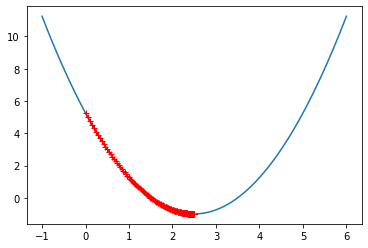

In [12]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [13]:
len(theta_history)

424

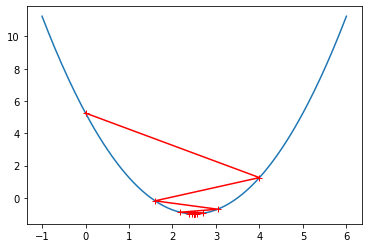

In [14]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [15]:
eta = 1.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

OverflowError: (34, 'Result too large')

In [16]:
def J(theta):
    try:
        return (theta-2.5)**2 - 1.
    except:
        return float('inf')

In [17]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
        i_iter += 1

In [18]:
eta = 1.1
theta_history = []
gradient_descent(0., eta)

In [19]:
len(theta_history)

10001

In [20]:
theta_history[-1]

nan

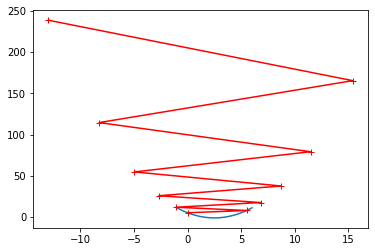

In [21]:
eta = 1.1
theta_history = []
gradient_descent(0., eta, n_iters=10)
plot_theta_history()

## 三、在线性回归模型中使用梯度下降法

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
np.random.seed(1234)
x = 2 * np.random.random(size=100)
y = x * 3 + 4. + np.random.normal(size=100)

In [24]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

In [25]:
y.shape

(100,)

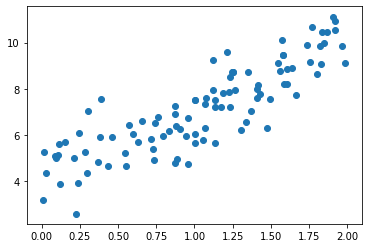

In [26]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

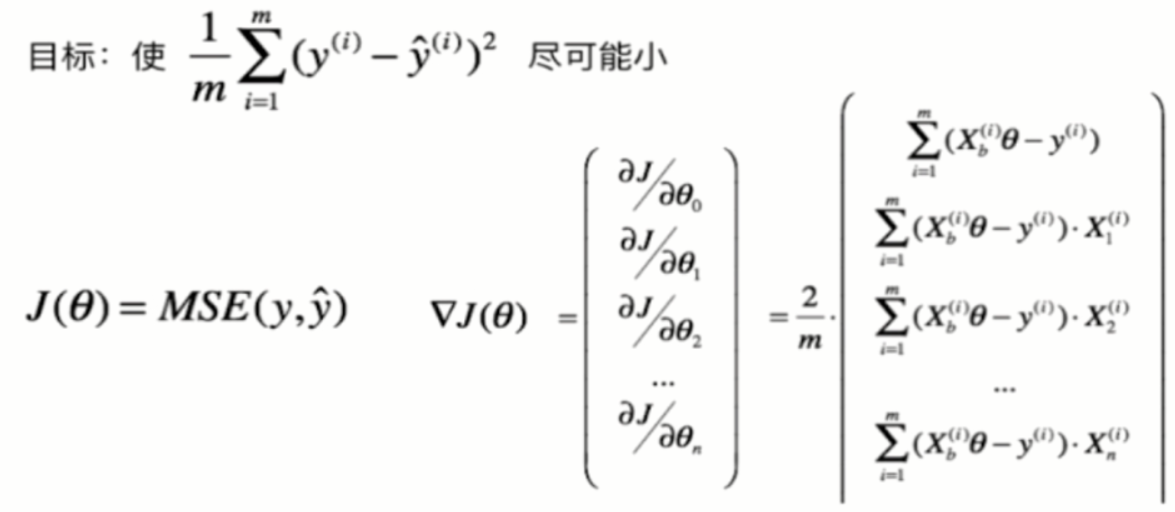

In [27]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [28]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [29]:
 def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [32]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [33]:
theta

array([4.0734983 , 2.94366276])

### 封装自己的线性回归算法

In [34]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//linear_regression.py

In [35]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [36]:
lin_reg.coef_

array([2.94366276])

In [37]:
lin_reg.intercept_

4.073498300830994

### 梯度下降法的向量化

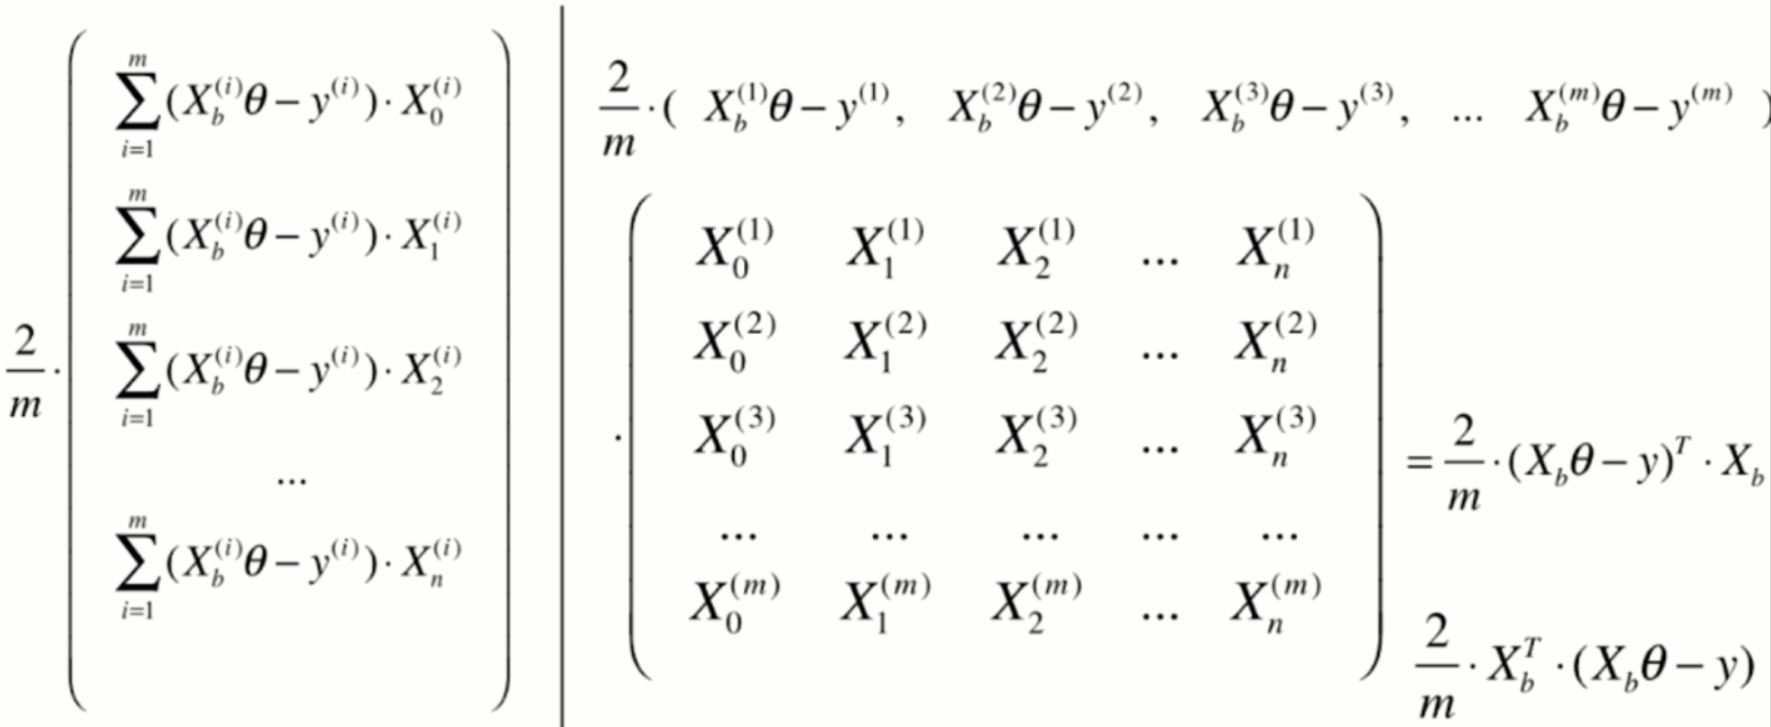

In [39]:
import numpy as np
from sklearn import datasets

In [40]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [41]:
%run D://资料//程序//Python//Machine_Learn//Preprocess//model_selection.py

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=1234)

In [43]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//linear_regression.py

#### 使用正规方程解

In [44]:
lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 2.99 ms


0.741030379147406

#### 使用梯度下降法

In [45]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

D:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\资料\程序\Python\Machine_Learn\LinearRegression\linear_regression.py:59: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
D:\资料\程序\Python\Machine_Learn\LinearRegression\linear_regression.py:80: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
D:\资料\程序\Python\Machine_Learn\LinearRegression\linear_regression.py:69: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)


LinearRegression()

In [46]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [47]:
X_train[:10,:]

array([[8.15174e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.00000e-01,
        5.39000e+00, 9.89000e+01, 1.72810e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.08500e+01],
       [1.62110e-01, 2.00000e+01, 6.96000e+00, 0.00000e+00, 4.64000e-01,
        6.24000e+00, 1.63000e+01, 4.42900e+00, 3.00000e+00, 2.23000e+02,
        1.86000e+01, 3.96900e+02, 6.59000e+00],
       [4.66883e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        5.97600e+00, 8.79000e+01, 2.58060e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 1.04800e+01, 1.90100e+01],
       [3.83518e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        5.45300e+00, 1.00000e+02, 1.48960e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 3.05900e+01],
       [5.37000e-01, 0.00000e+00, 6.20000e+00, 0.00000e+00, 5.04000e-01,
        5.98100e+00, 6.81000e+01, 3.67150e+00, 8.00000e+00, 3.07000e+02,
        1.74000e+01, 3.78350e+02, 1.16500e+01],
       [8.79212e+00, 0.00000e+

In [48]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [49]:
lin_reg2.score(X_test, y_test)

0.2630275053327349

In [50]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

Wall time: 1min 9s


LinearRegression()

In [51]:
lin_reg2.score(X_test, y_test)

0.6998588142666322

### 使用梯度下降法前，最好进行数据归一化

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_train_standard = standardScaler.transform(X_train)

In [55]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 339 ms


LinearRegression()

In [56]:
X_test_standard = standardScaler.transform(X_test)

In [57]:
lin_reg3.score(X_test_standard, y_test)

0.7410581266298961

#### 梯度下降法的优势（减小样本特征数对计算复杂度的影响，缩短计算时间）

In [68]:
m = 1000
n = 10000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [69]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 31.6 s


LinearRegression()

In [70]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 3.65 s


LinearRegression()

## 四、随机梯度下降法

#### 批量梯度下降法（Batch Gradient Descent）：对所有样本进行批量计算

#### 随机梯度下降法（Stochastic Gradient Descent）：随机选择一个样本计算搜索方向（非梯度方向，减小样本数对计算复杂度的影响【一定精度换取时间】）

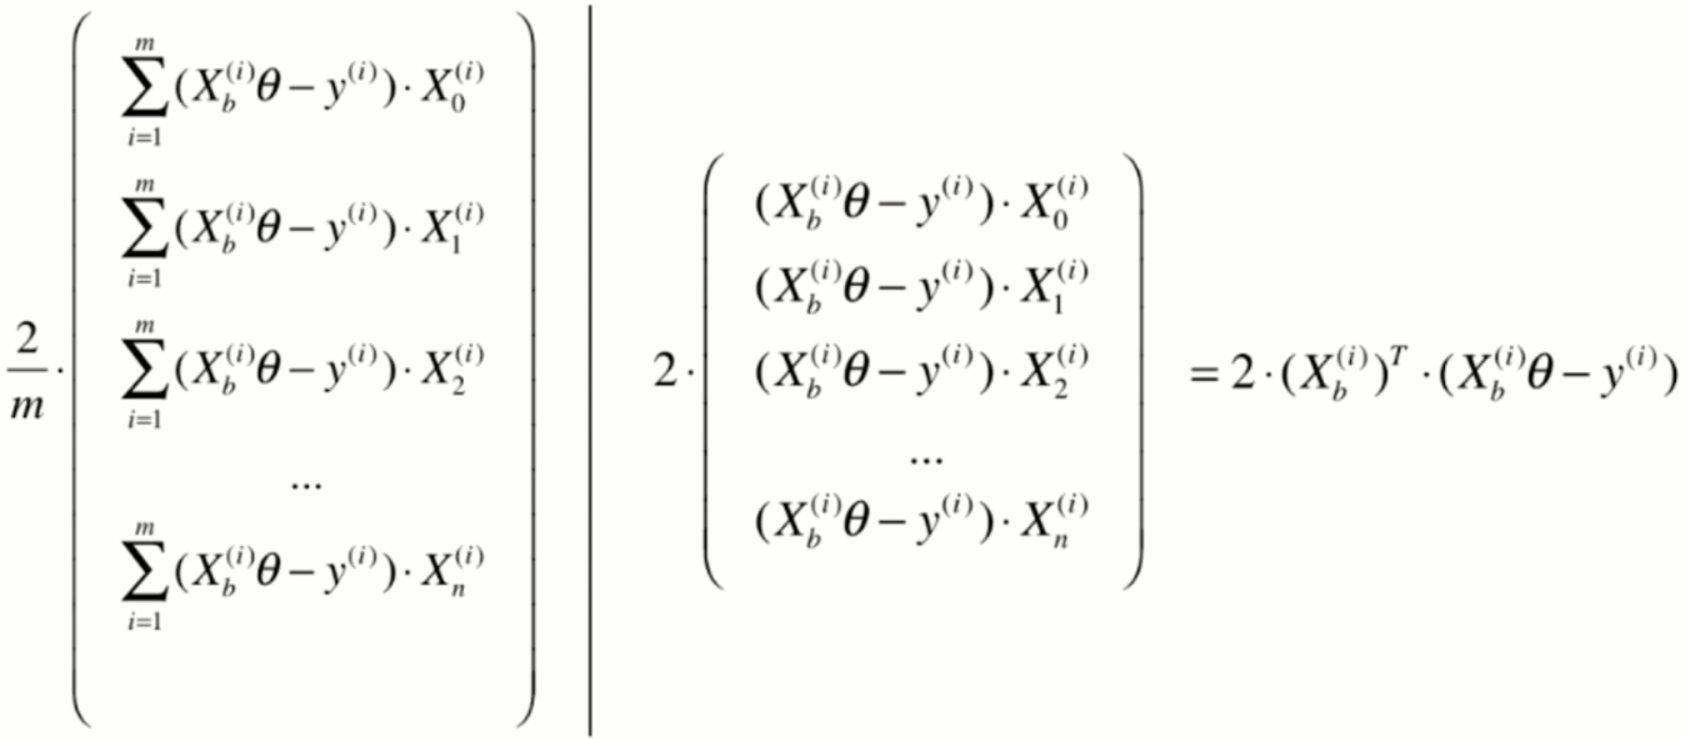

#### 随机梯度下降法的学习率：η = a / (i_iters + b)，其中a、b为超参数，经验值：a=5，b=50，η逐渐减小以避免跳出最优值（模拟退火的思想）

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.*x + 3. + np.random.normal(0,3,size=m)

In [73]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

#### 批量梯度下降法

In [74]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 794 ms


In [75]:
theta

array([2.98770366, 4.00577058])

#### 随机梯度下降法

In [78]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5;
    t1 = 50;
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    
    return theta

In [79]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

Wall time: 573 ms


In [80]:
theta

array([2.97341153, 4.01571832])

### 使用自己的随机梯度下降法（SGD）

In [81]:
import numpy as np
import matplotlib.pyplot as plt

#### 使用模拟数据

In [82]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.*x + 3. + np.random.normal(0,3,size=m)

In [83]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//linear_regression.py

In [85]:
lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [86]:
lin_reg.coef_

array([3.97364974])

In [87]:
lin_reg.intercept_

3.0288954345065684

#### 使用真实数据

In [88]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [89]:
%run D://资料//程序//Python//Machine_Learn//Preprocess//model_selection.py

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=1234)

In [91]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [92]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//linear_regression.py

In [93]:
lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)

Wall time: 7.98 ms


0.576736681038568

In [94]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)
lin_reg.score(X_test_standard, y_test)

Wall time: 141 ms


0.7427419063190359

### scikit-learn中的随机梯度下降法（SGD）

In [98]:
from sklearn.linear_model import SGDRegressor

In [99]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 4.96 ms


0.7430131710750435

## 五、关于梯度的调试

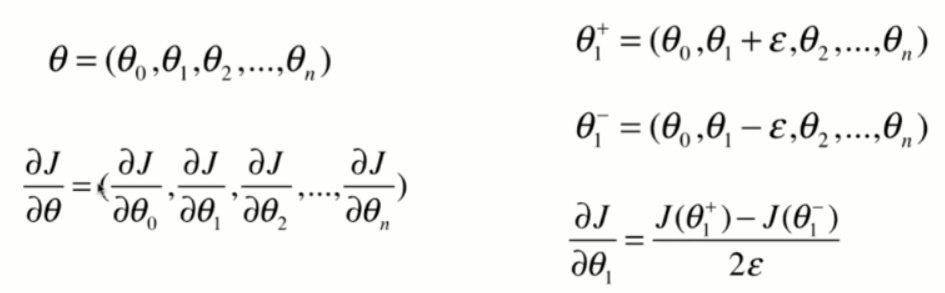

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
np.random.seed(1234)
X = np.random.random(size=(1000, 10))

In [104]:
true_theta = np.arange(1, 12, dtype=float)

In [106]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [107]:
X.shape

(1000, 10)

In [108]:
y.shape

(1000,)

In [109]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [110]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [111]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)

In [112]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2*epsilon)
    return res

In [113]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [114]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 4.6 s


array([ 1.19356357,  1.71584901,  2.77867604,  4.114118  ,  4.99103135,
        6.04820497,  6.89776533,  8.13832248,  8.83172609,  9.91015844,
       11.17834222])

In [115]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

Wall time: 709 ms


array([ 1.19356357,  1.71584901,  2.77867604,  4.114118  ,  4.99103135,
        6.04820497,  6.89776533,  8.13832248,  8.83172609,  9.91015844,
       11.17834222])

## 六、总结

#### 1、批量梯度下降法（Batch Gradient Descent）：计算慢但是稳定
#### 2、随机梯度下降法（Stochastic Gradient Descent）：
#### （1）优点：跳出局部最优解；更快的运行速度
#### （2）机器学习领域很多算法都有使用随机的特点，比如随机搜索、随机森林
#### 3、小批量梯度下降法（Mini-Batch Gradient Descent）：结合以上两种梯度下降法的特点